In [55]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1



# Deliverable 3


In [56]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"], axis=1)
application_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [57]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [58]:
inc_amt_counts = application_df.INCOME_AMT.value_counts()
inc_amt_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [59]:
# Look at APPLICATION_TYPE value counts for binning
application_value_df = application_df.loc[:, "APPLICATION_TYPE"].value_counts()
application_value_df

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

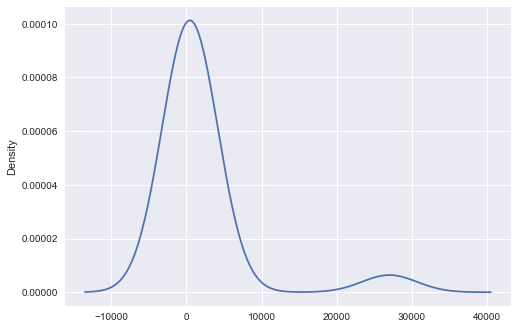

In [60]:
# Visualize the value counts of APPLICATION_TYPE
application_value_df.plot(kind="density")

In [61]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_value_df[application_value_df < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [62]:
# Look at CLASSIFICATION value counts for binning
classification_value_df = application_df.loc[:, "CLASSIFICATION"].value_counts()
classification_value_df

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

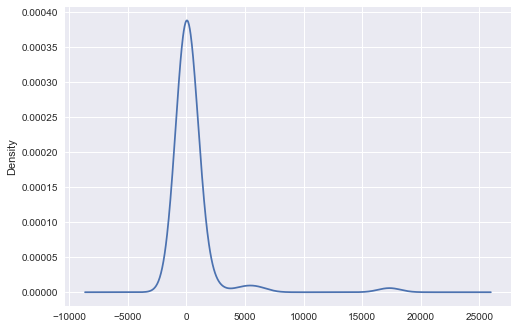

In [63]:
classification_value_df.plot(kind="density")

In [64]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_value_df[classification_value_df < 200].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [65]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()

In [66]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\girar\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
# Merge one-hot encoded features and drop the originals
encoded_application_df = application_df.merge(encode_df, left_index = True, right_index = True).drop(columns = application_cat)
encoded_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
# Split our preprocessed data into our features and target arrays
y = encoded_application_df.loc[:, "IS_SUCCESSFUL"].values
X = encoded_application_df.drop(columns=["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [69]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

In [70]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  60
hidden_nodes_layer2 = 70
hidden_nodes_layer3 = 50
hidden_nodes_layer4 = 40
hidden_nodes_layer5 = 10

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 60)                2760      
                                                                 
 dense_13 (Dense)            (None, 70)                4270      
                                                                 
 dense_14 (Dense)            (None, 70)                4970      
                                                                 
 dense_15 (Dense)            (None, 70)                4970      
                                                                 
 dense_16 (Dense)            (None, 70)                4970      
                                                                 
 dense_17 (Dense)            (None, 1)                 71        
                                                                 
Total params: 22,011
Trainable params: 22,011
Non-trai

In [71]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [72]:
# Train the model
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "models/model-{epoch:03d}",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    mode="auto",
)
# Fit the model to the training data
fit_model = nn_model.fit(
    X_train, y_train, epochs=100, callbacks=[checkpoint], validation_split=0.2
)


Epoch 1/100
644/644 [==============================] - 2s 2ms/step - loss: 7717.7871 - accuracy: 0.4938 - val_loss: 128.0789 - val_accuracy: 0.4810
Epoch 2/100
644/644 [==============================] - 1s 1ms/step - loss: 3348.3181 - accuracy: 0.4956 - val_loss: 1882.6954 - val_accuracy: 0.5190
Epoch 3/100
644/644 [==============================] - 1s 1ms/step - loss: 2097.0811 - accuracy: 0.4974 - val_loss: 276.9590 - val_accuracy: 0.4810
Epoch 4/100
644/644 [==============================] - 1s 1ms/step - loss: 2358.4329 - accuracy: 0.4915 - val_loss: 1082.2474 - val_accuracy: 0.5190
Epoch 5/100
644/644 [==============================] - 2s 3ms/step - loss: 768.6464 - accuracy: 0.5110 - val_loss: 201.2194 - val_accuracy: 0.5190
Epoch 6/100
644/644 [==============================] - 2s 4ms/step - loss: 88.7984 - accuracy: 0.5240 - val_loss: 0.7200 - val_accuracy: 0.5190
Epoch 7/100
644/644 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5350 - val_loss: 0.

644/644 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.5350 - val_loss: 0.6935 - val_accuracy: 0.5190
Epoch 52/100
644/644 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.5350 - val_loss: 0.6926 - val_accuracy: 0.5190
Epoch 53/100
644/644 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5350 - val_loss: 0.6930 - val_accuracy: 0.5190
Epoch 54/100
644/644 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5350 - val_loss: 0.6929 - val_accuracy: 0.5190
Epoch 55/100
644/644 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.5350 - val_loss: 0.6926 - val_accuracy: 0.5190
Epoch 56/100
644/644 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.5350 - val_loss: 0.6928 - val_accuracy: 0.5190
Epoch 57/100
644/644 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.5350 - val_loss: 0.6933 - val_accuracy: 0.5190
Epoch

In [73]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6899 - accuracy: 0.5342 - 180ms/epoch - 671us/step
Loss: 0.6898717284202576, Accuracy: 0.5342274308204651


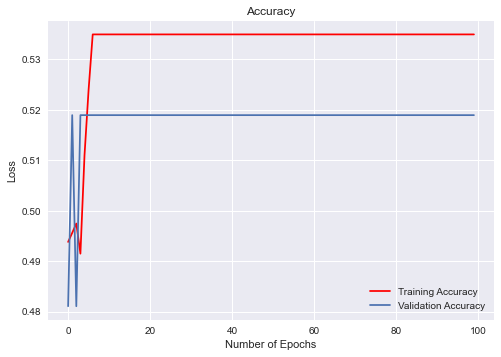

In [74]:
# Another Chart of what
# Defined style for plot
plt.style.use("seaborn")
plt.title("Accuracy")
plt.plot(fit_model.history["accuracy"], "r", label="Training Accuracy")
plt.plot(fit_model.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("./resources/accuracy.png")
plt.show()

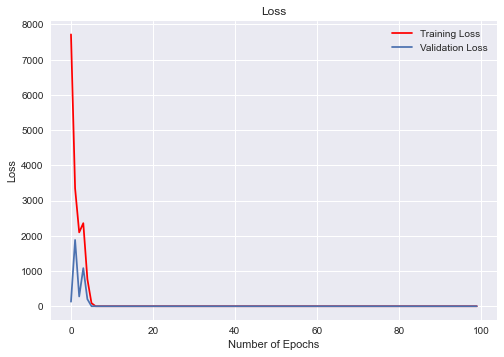

In [75]:
# Chart of What?
# Defined style for plot
plt.style.use("seaborn")
plt.title("Loss")
plt.plot(fit_model.history["loss"], "r", label="Training Loss")
plt.plot(fit_model.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("./resources/loss.png")
plt.show()


In [76]:
# Properly save the model for API use.
nn_model.save("./models/model-checkpoints-color/model")

INFO:tensorflow:Assets written to: ./models/model-checkpoints-color/model\assets
